#### Honor Code 
**"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." - Krishanthi Weragalarachchi**

## Bank Credit Data  - Final Project - MIS665

## Section 1 :  Data Source: 

The German Credit data set (available at ftp.ics.uci.edu/pub/machine-learning-databases/statlog/) contains
observations on 30 variables for 1000 past applicants for credit. Each applicant was rated as “good credit”
(700 cases) or “bad credit” (300 cases).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np  
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("bank.csv")
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,1
996,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,1
997,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,1
998,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,0


## Section 2 : Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

All columns have 1000 non-null values and therefore **no missing values**

All the purposes of the loan were combined to a column called "PURPOSE" and values were assigned as follows;

1 - new car \
2 - used car \
3 - furniture \
4 - Radio/TV \
5 - education \
6 - retraining and \
0 - other

In [4]:
# collect purpose to one column called "PURPOSE"
df['PURPOSE']=0 # create a new column called Purpose and assign 0 to all entries
df.loc[df['NEW_CAR']==1,'PURPOSE']=1 # Assign Purpose 1 if NEW_CAR =1
df.loc[df['USED_CAR']==1,'PURPOSE']=2 # Assign Purpose 2 if USED_CAR =1
df.loc[df['FURNITURE']==1,'PURPOSE']=3 # so on...
df.loc[df['RADIO/TV']==1,'PURPOSE']=4
df.loc[df['EDUCATION']==1,'PURPOSE']=5
df.loc[df['RETRAINING']==1,'PURPOSE']=6
# delete all the columns that used to make PURPOSE column
df.drop(['NEW_CAR','USED_CAR','FURNITURE','RADIO/TV','EDUCATION','RETRAINING'],axis=1,inplace=True)

"SEX" column was created assigning 0 to females and 1 to males.

In [5]:
df['SEX']=0 # create a new column "SEX" and fill it with 0's
# Populate it with 1 if MALE_DIV,MALE_SINGLE or MALE_MAR_or_WID = 1
df.loc[df['MALE_DIV']==1,'SEX']=1
df.loc[df['MALE_SINGLE']==1,'SEX']=1
df.loc[df['MALE_MAR_or_WID']==1,'SEX']=1
# delete all the columns that used to make SEX column
df.drop(['MALE_DIV','MALE_SINGLE','MALE_MAR_or_WID'],axis=1,inplace=True)

"EXPENSES" column was created for all the expenses listed

In [6]:
# create a new column "EXPENSES" and fill it with 0's 0 indicates no expenses
df['EXPENSES']=0 
# Populate it with 1 if OTHER_INSTALL or RENT = 1
df.loc[df['OTHER_INSTALL']==1,'EXPENSES']=1
df.loc[df['RENT']==1,'EXPENSES']=1
# delete OTHER_INSTALL or RENT columns
df.drop(['OTHER_INSTALL','RENT'],axis=1,inplace=True)

"PROPERTY" column was created for all the property listed.

In [7]:
# create a new column "PROPERTY" and fill it with 0's 0 indicates no property
df['PROPERTY']=0 
# Populate it with 1 if REAL_ESTATE or OWN_RES = 1
df.loc[df['REAL_ESTATE']==1,'PROPERTY']=1
df.loc[df['OWN_RES']==1,'PROPERTY']=1
# Populate it with 0 if PROP_UNKN_NONE = 1
df.loc[df['PROP_UNKN_NONE']==1,'PROPERTY']=0
# delete columns which used to fill or PROPERTY columns
df.drop(['REAL_ESTATE','OWN_RES','PROP_UNKN_NONE'],axis=1,inplace=True)

In order to analyze data numarical variables were changed to catogorical variables by putting them into bins. Original numarical values were kept seperate for analysis as well.

In [8]:
bins1=[10,30,50,70,90]
labels1 = ['Teenager/Young Adult', 'Adult', 'Adult/Senior','Senior']
df['AgeGroup'] = pd.cut(df["AGE"], bins1, labels = labels1)

bins2=[0,12,24,36,48,60,72]
labels2 = ['Y1', 'Y2', 'Y3','Y4','Y5','Y6']
df['Duration_Years'] = pd.cut(df["DURATION"], bins2, labels = labels2)

bins3=[0,3000,6000,9000,12000,15000,18000,20000]
labels3 = ['<3k', '3k<6k', '6k<9k', '9k<12k','12k<15k','15k<18k','18k<20k']
df['AMOUNT_bins'] = pd.cut(df["AMOUNT"], bins3, labels = labels3)

In [9]:
df.head()

,CHK_ACCT,DURATION,HISTORY,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,...,TELEPHONE,FOREIGN,RESPONSE,PURPOSE,SEX,EXPENSES,PROPERTY,AgeGroup,Duration_Years,AMOUNT_bins
0,0,6,4,1169,4,4,4,0,0,4,...,1,0,1,4,1,0,1,Adult/Senior,Y1,<3k
1,1,48,2,5951,0,2,2,0,0,2,...,0,0,0,4,0,0,1,Teenager/Young Adult,Y4,3k<6k
2,3,12,4,2096,0,3,2,0,0,3,...,0,0,1,5,1,0,1,Adult,Y1,<3k
3,0,42,2,7882,0,3,2,0,1,4,...,0,0,1,3,1,0,0,Adult,Y4,6k<9k
4,0,24,3,4870,0,2,3,0,0,4,...,0,0,0,1,1,0,0,Adult/Senior,Y2,3k<6k


### Feature Selection
Each applicant was rated as “good credit” (700 cases) or “bad credit” (300 cases) according to 30 predictor variables. chi2_contingency function from scipy.stats was used to compute the chi-square statistic and p-value for all catogorical values to find best features for representing "RESPONSE" variable.   

In [10]:
from scipy import stats
Attributes=['HISTORY','EMPLOYMENT','INSTALL_RATE','CO-APPLICANT','GUARANTOR','PRESENT_RESIDENT','NUM_DEPENDENTS','TELEPHONE','FOREIGN',"CHK_ACCT","SAV_ACCT","NUM_CREDITS","JOB","PURPOSE","SEX","EXPENSES","PROPERTY"]

stat_sig=[]
for i in Attributes:
    data_count=pd.crosstab(df[i],df["RESPONSE"]).reset_index()
    obs=np.asarray(data_count[[0,1]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    stat_sig.append([i,round(p,6)])
statsig_df=pd.DataFrame(stat_sig)
statsig_df.columns=["Feature","P-value"]
statsig_df

,Feature,P-value
0,HISTORY,0.000000
1,EMPLOYMENT,0.001045
2,INSTALL_RATE,0.140033
3,CO-APPLICANT,0.070351
4,GUARANTOR,0.112945
5,PRESENT_RESIDENT,0.861552
6,NUM_DEPENDENTS,1.000000
7,TELEPHONE,0.278876
8,FOREIGN,0.015831
9,CHK_ACCT,0.000000


All the features have p-value greatar than 0.05 were droped form the data set. After downsizing the number of variables, we have only 20 variables to choose from.

In [11]:
df.drop(['INSTALL_RATE','CO-APPLICANT','GUARANTOR','PRESENT_RESIDENT','NUM_DEPENDENTS','TELEPHONE','NUM_CREDITS','JOB'],axis=1,inplace=True)

In [12]:
df.describe()

,CHK_ACCT,DURATION,HISTORY,AMOUNT,SAV_ACCT,EMPLOYMENT,AGE,FOREIGN,RESPONSE,PURPOSE,SEX,EXPENSES,PROPERTY
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,3271.258000,1.105000,2.384000,35.546000,0.037000,0.700000,2.935000,0.690000,0.342000,0.737000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,11.375469,0.188856,0.458487,1.698723,0.462725,0.474617,0.440483
min,0.000000,4.000000,0.00000,250.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,1365.500000,0.000000,2.000000,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,2319.500000,0.000000,2.000000,33.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,3972.250000,2.000000,4.000000,42.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000
max,3.000000,72.000000,4.00000,18424.000000,4.000000,4.000000,75.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CHK_ACCT        1000 non-null   int64   
 1   DURATION        1000 non-null   int64   
 2   HISTORY         1000 non-null   int64   
 3   AMOUNT          1000 non-null   int64   
 4   SAV_ACCT        1000 non-null   int64   
 5   EMPLOYMENT      1000 non-null   int64   
 6   AGE             1000 non-null   int64   
 7   FOREIGN         1000 non-null   int64   
 8   RESPONSE        1000 non-null   int64   
 9   PURPOSE         1000 non-null   int64   
 10  SEX             1000 non-null   int64   
 11  EXPENSES        1000 non-null   int64   
 12  PROPERTY        1000 non-null   int64   
 13  AgeGroup        1000 non-null   category
 14  Duration_Years  1000 non-null   category
 15  AMOUNT_bins     1000 non-null   category
dtypes: category(3), int64(13)
memory usage: 105.4 KB


The dataset has 15 columns including Age,duration and amount representing in two columns each one as catogorical and one as non catogorical.

## Section 3: Data visualization & business intelligence

### 1. History

In [14]:
from matplotlib.gridspec import GridSpec

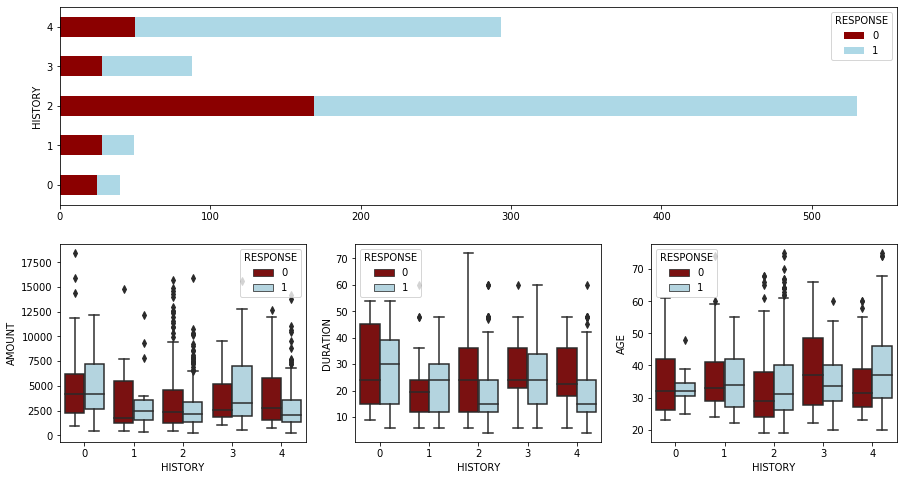

In [15]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palh=['darkred','lightblue']


h1=df.groupby(['HISTORY', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palh)
h2 = sns.boxplot(x="HISTORY",y="AMOUNT", data=df,hue='RESPONSE',palette=palh,ax=ax1)
h3 = sns.boxplot(x="HISTORY", y="DURATION", data=df, palette=palh, hue = "RESPONSE",ax=ax2)
h4 = sns.boxplot(x="HISTORY", y="AGE", data=df, palette=palh, hue = "RESPONSE",ax=ax3)

0,1,2,3 and 4 catogories represent no credits taken, all paid off, existing credits paid back on time, delay in past and critical account respectively. According to the bar chart(h1), higher percentage of first time applicants(0) and applicant who has fullfill earlier credit loans(1) rated as "bad creidts", meaning they have higher chance of defaulting the loan. Surprisingly, applicants who have critical accounts tend to label as "good credits" as there is high chance that they pay back.

The applicants who apply for the first time tend apply for median of bigger amount of money compared to other groups(h2) and they are usually young adults of age 30 (h3). From this group applicant who labeled as 'good credits' take longer time to pay back(h4). Applicants who have delayed to pay back in the past are usually of median age of 37 if they are "bad credits".

### 2. Checking Account 

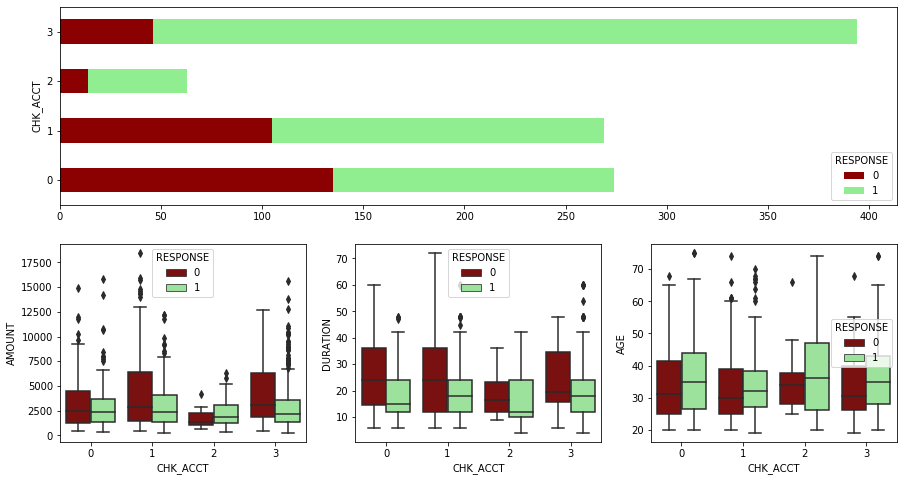

In [16]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palc=['darkred','lightgreen']
c1=df.groupby(['CHK_ACCT', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palc)
c2 = sns.boxplot(x="CHK_ACCT",y="AMOUNT", data=df,hue='RESPONSE',palette=palc,ax=ax1)
c3 = sns.boxplot(x="CHK_ACCT", y="DURATION", data=df, palette=palc, hue = "RESPONSE",ax=ax2)
c4 = sns.boxplot(x="CHK_ACCT", y="AGE", data=df, palette=palc, hue = "RESPONSE",ax=ax3)

0,1,2 and 3 catogories represent <0 DM,<200 DM,>=200 DM and no checking account respectively. Applicants who have >200 DM are expected to fullfill the credit loan in time. Moreover, applicants do not have credit acoounts also tend to pay back and labeled as "good credits". Applicants who has less amount of money has a 50% chance of paying back(c1).
According to boxplot(c3), the ones who take longer median duration are the ones who default loans and usually have negative balance or <200 DM in their checking account.

### 3. Savings Acoount

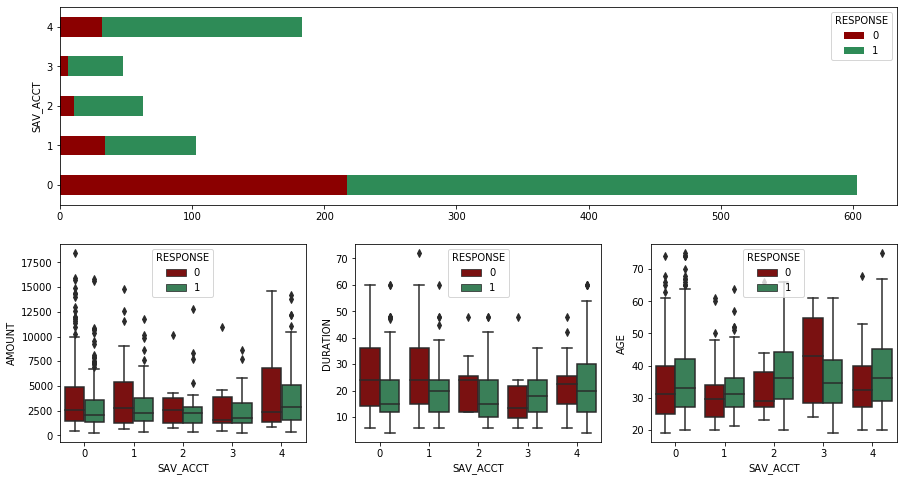

In [17]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
pals=['darkred','seagreen']

s1=df.groupby(['SAV_ACCT', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=pals)
s2 = sns.boxplot(x="SAV_ACCT",y="AMOUNT", data=df,hue='RESPONSE',palette=pals,ax=ax1)
s3 = sns.boxplot(x="SAV_ACCT", y="DURATION", data=df, palette=pals, hue = "RESPONSE",ax=ax2)
s4 = sns.boxplot(x="SAV_ACCT", y="AGE", data=df, palette=pals, hue = "RESPONSE",ax=ax3)

0,1,2,3 and 4 represent <100 DM, 100 to 500 DM, 500 to 1000 DM, >1000 DM and unknown/no savings account respectively. Here also the same trend like checking account can be seen. Higher percentage of applicants who have more money in savings account and applicants who do not have savings account tend to pay back and hence labelled as "good credits"(s1). Applicants who has larger amount of money (>1000 DM) and of median age of 45 has higher chance of defaulting(s4).

### 4. Property

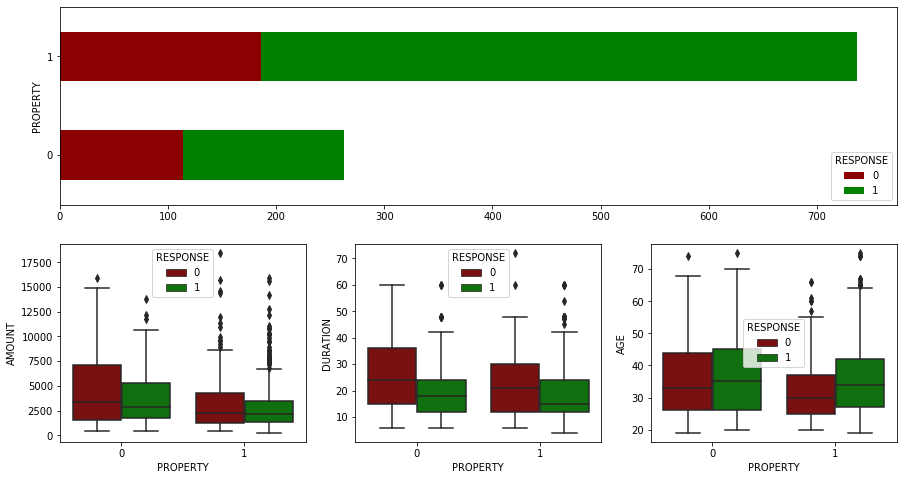

In [18]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palpr=['darkred','green']

pr1=df.groupby(['PROPERTY', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palpr)
pr2 = sns.boxplot(x="PROPERTY",y="AMOUNT", data=df,hue='RESPONSE',palette=palpr,ax=ax1)
pr3 = sns.boxplot(x="PROPERTY", y="DURATION", data=df, palette=palpr, hue = "RESPONSE",ax=ax2)
pr4 = sns.boxplot(x="PROPERTY", y="AGE", data=df, palette=palpr, hue = "RESPONSE",ax=ax3)

0 represents no property and 1 represents some property. As can be seen from the stacked bar chart(pr1), applicants who own some property has a more chance of fullfilling the credit agreement and hence, labaled as "good credit". Applicants who labelled as "bad credit" who doesnot own a property usually take longer median credit duration compared to applicants who doesnot own property but labeled as "good credit"(s3).

Normally, people who are financially stable tend to payback credits and keep good credit score.

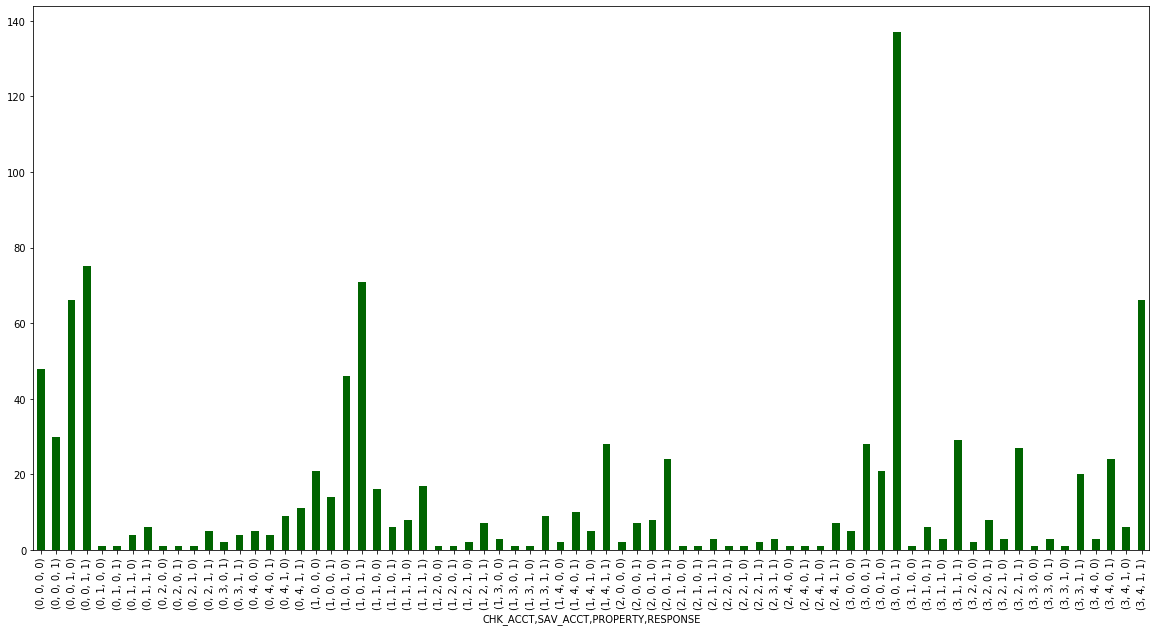

In [19]:
df.groupby(['CHK_ACCT','SAV_ACCT','PROPERTY','RESPONSE']).size().T.plot(kind="bar",figsize=(20,10),color="darkgreen")

Above graph shows that people who does not have checking account, and <100 DM in their savings account and owns a property(3,0,1,1) maintain "good credit". The other 3 groups maintain "good credit" are;

0,0,1,1 - negative balance in checking account, <100 DM in savings account and owns property.*

1,0,1,1 - <200 DM in checking account, <100 DM in savings account and owns a property.*

3,4,1,1 - no checking or savings account and owns a property.

The applicants default the credit agreement are;

0,0,1,0 - negative balance in checking account, <100 DM in savings account and owns property.*

0,0,0,0 - negative balance in checking account, <100 DM in savings account and owns no property.

1,0,1,0 - <200 DM in checking account, <100 DM in savings account and owns a property.*

*the same groups appear in "good credit" and "bad credit", meaning that higher percentage of applicants are fall in to these groups.

### 5. Purpose

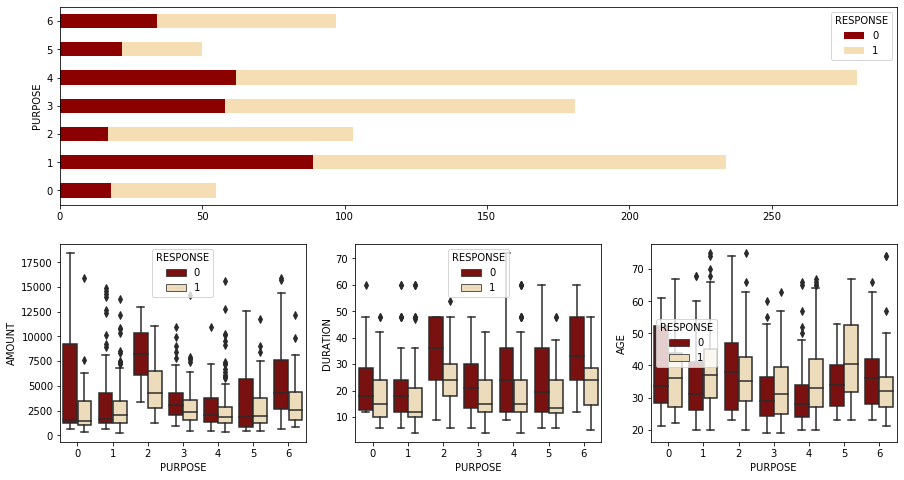

In [20]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palp=["darkred","wheat"]
p1=df.groupby(['PURPOSE', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palp)
p2 = sns.boxplot(x="PURPOSE",y="AMOUNT", data=df,hue='RESPONSE',palette=palp,ax=ax1)
p3 = sns.boxplot(x="PURPOSE", y="DURATION", data=df, palette=palp, hue = "RESPONSE",ax=ax2)
p4 = sns.boxplot(x="PURPOSE", y="AGE", data=df, palette=palp, hue = "RESPONSE",ax=ax3)

0,1,2,3,4,5 and 6 represent 'unknown purpose', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION' and 'RETRAINING' respectively. According to stacked bar chart(p1), there is a higher chance that loan get default if the purpose of the loan is to buy a new car. They are usually middle aged applicants of median age of 30(p4). The most of the applicants who apply for a loan to buy a used car pays back and labelled as "good credit"(p1). However, the ones who default the loan which has been taken in order to buy a used car, usually get median amount of about 90000 DM which is very high compared to the median amount for other groups(p2).

### 6. Sex

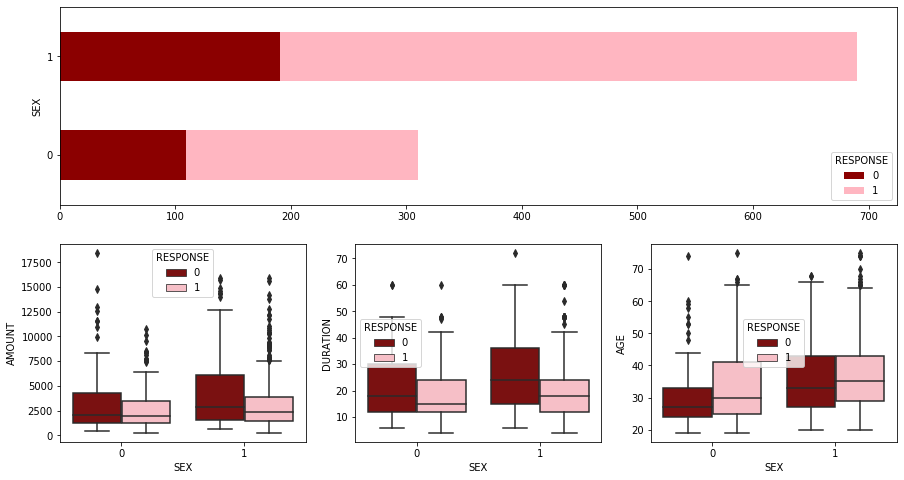

In [21]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palsex=["darkred","lightpink"]
sex1=df.groupby(['SEX', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palsex)
sex2 = sns.boxplot(x="SEX",y="AMOUNT", data=df,hue='RESPONSE',palette=palsex,ax=ax1)
sex3 = sns.boxplot(x="SEX", y="DURATION", data=df, palette=palsex, hue = "RESPONSE",ax=ax2)
sex4 = sns.boxplot(x="SEX", y="AGE", data=df, palette=palsex, hue = "RESPONSE",ax=ax3)

0 represents females and 1 represents males. Higher percentage of males labelled as "good credit" compared to females(sex1). "bad credit"- females are usually of median age of about 27 whereas "bad credit"-males are of median age of 35(sex4). "bad-credit"-males take longer duration to payback.

### 7. Employment

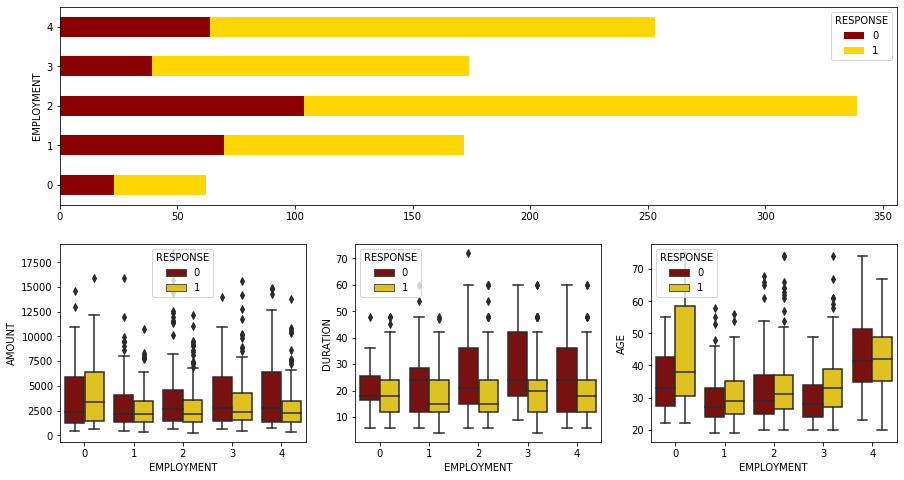

In [22]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
pale=["darkred","gold"]
e1=df.groupby(['EMPLOYMENT', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=pale)
e2 = sns.boxplot(x="EMPLOYMENT",y="AMOUNT", data=df,hue='RESPONSE',palette=pale,ax=ax1)
e3= sns.boxplot(x="EMPLOYMENT", y="DURATION", data=df, palette=pale, hue = "RESPONSE",ax=ax2)
e4= sns.boxplot(x="EMPLOYMENT", y="AGE", data=df, palette=pale, hue = "RESPONSE",ax=ax3)

0,1,2,3 and 4 represent unemployement, less than a year of employment, 1 to 4 years of employment, 4 to 7 years of employment and greater than 7 years of employment. Applicants who have been working for about 4 years tend to pay back the most from all. Applicants who had no employement and the who have been working for less than a year are the ones who defaulted the most as a percentage of total of each group(e1). Median age of both "good credit" labeled applicants and "bad credti" labeled applicants in catogory 4 are usually higher compared to other groups in all catogories which is not very surprising(e4). the ones who take longer median duration are the applicants who have been working for 1 to 4 years and default the credit aggreement(e3).

### 8. Expenses

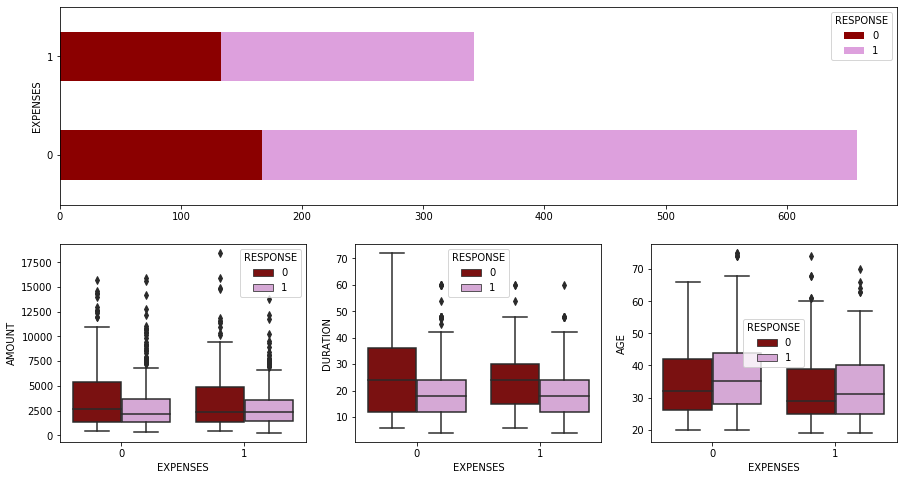

In [23]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palex=["darkred","plum"]
ex1=df.groupby(['EXPENSES', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palex)
ex2 = sns.boxplot(x="EXPENSES",y="AMOUNT", data=df,hue='RESPONSE',palette=palex,ax=ax1)
ex3 = sns.boxplot(x="EXPENSES", y="DURATION", data=df, palette=palex, hue = "RESPONSE",ax=ax2)
ex3 = sns.boxplot(x="EXPENSES", y="AGE", data=df, palette=palex, hue = "RESPONSE",ax=ax3)

0 represent no expenses and 1 represent some expenses. It is clear from the bar graph that, a larger number of applicants fall in to "good credit" and from them higher percentage do not have expenses. The applicants who default have longer median duration and less median age compared to applicants who payback for groups 0 and 1.

### 9. Foreign

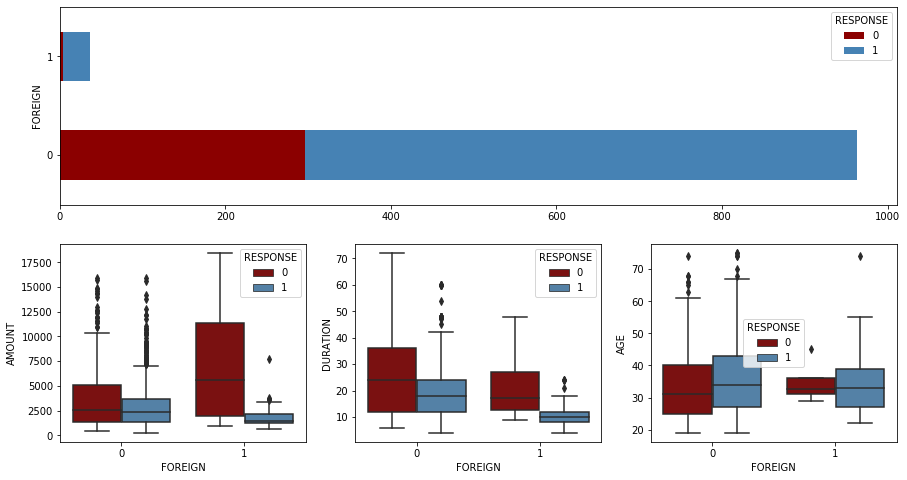

In [24]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
palf=["darkred","steelblue"]


f1=df.groupby(['FOREIGN', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palf)
f2 = sns.boxplot(x="FOREIGN",y="AMOUNT", data=df,hue='RESPONSE',palette=palf,ax=ax1)
f3 = sns.boxplot(x="FOREIGN", y="DURATION", data=df, palette=palf, hue = "RESPONSE",ax=ax2)
f3 = sns.boxplot(x="FOREIGN", y="AGE", data=df, palette=palf, hue = "RESPONSE",ax=ax3)

According to the bar graph,the most applicants are locals who maintan "good credit"(f1). Foreign applicants have higher chance of fullfilling the loan, compared to that of locals. If it is a local, there is 1/3 chance that they would default(f1). Moreover, forigners who default take larger credit loans with median of 10,000 DM.

### 10. Age as catogorical variable - AgeGroup

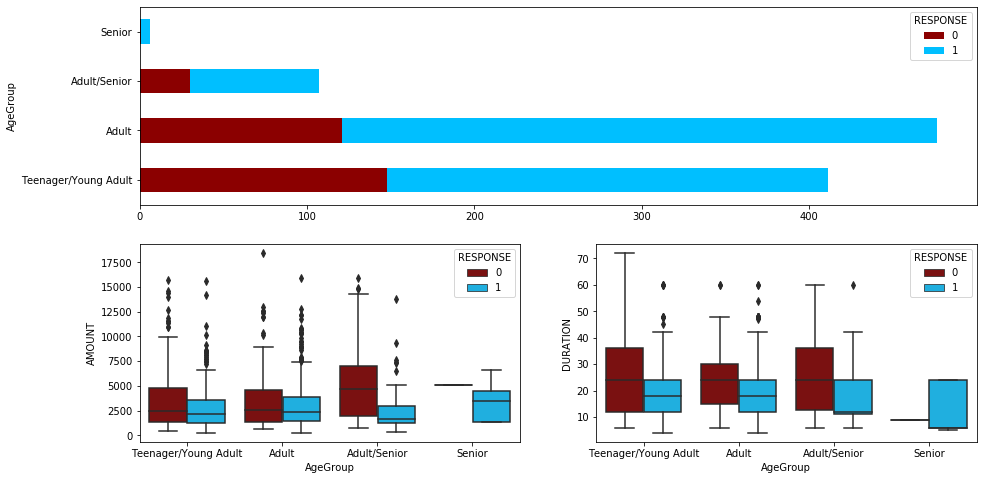

In [25]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
pala=["darkred","deepskyblue"]
a1=df.groupby(['AgeGroup', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=pala)
a2 = sns.boxplot(x="AgeGroup",y="AMOUNT", data=df,hue='RESPONSE',palette=pala,ax=ax1)
a3 = sns.boxplot(x="AgeGroup", y="DURATION", data=df, palette=pala, hue = "RESPONSE",ax=ax2)

according to the bar graph, the most applicants are under the age of 50. There is a trend that as the applicants get older, they tend to pay back and maintain "good credit". The most defaut group is the Teenager/Young adults who falls under the age of 30(a1). The default median credit amount tends to go higher as the age increases, meaning people tend to have hard ships or cheat more as they mature. Moreover, Seniors of age above 70 have law chance of defaulting and they take about median amount of 5000 DM credit loans and usually payback within median duration of 5 years.

### 11. Duration as catogorical variable - Duration_Years


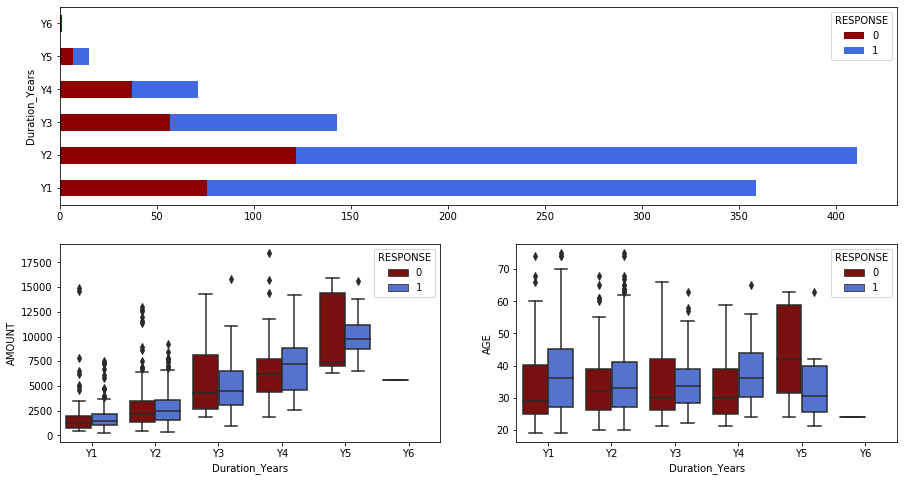

In [26]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
pald=["darkred","royalblue"]
d1=df.groupby(['Duration_Years', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=pald)
d2 = sns.boxplot(x="Duration_Years",y="AMOUNT", data=df,hue='RESPONSE',palette=pald,ax=ax1)
d3 = sns.boxplot(x="Duration_Years", y="AGE", data=df, palette=pald, hue = "RESPONSE",ax=ax2)

According to the barchart, the chance of defaluting increase as the duration increases(d1). The most defaulted group is the applicants who take loan for 2 years and they are only about 1/3 of the total of the group it self. However, applicants who take loan for 4 years has the highest chance of defaulting(d1). Amount and duration shows a significant correlation such that, amount goes higher as the duration extends(d2). Moreover, applicants who take the loan for 5 years and default it has the highest median age(~40)(d3).

### 12. Amount as catogorical variable - Amount_bins


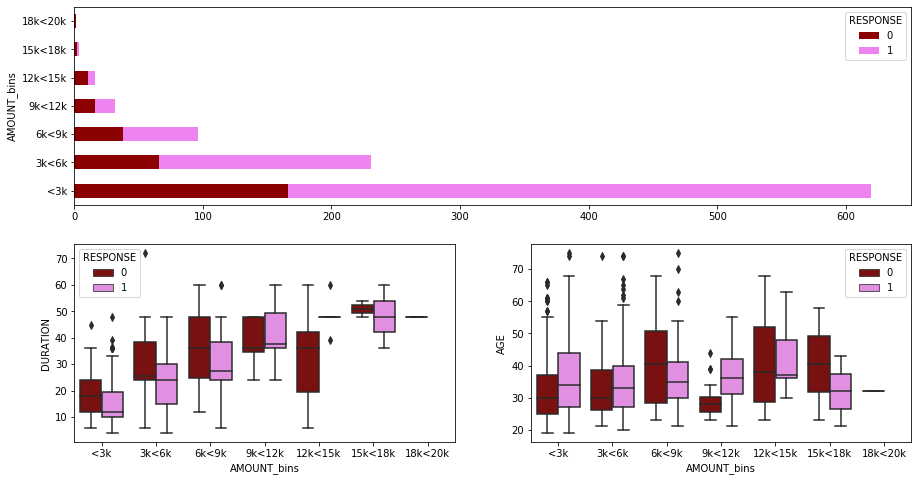

In [27]:
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
palam=["darkred","violet"]
am1=df.groupby(['AMOUNT_bins', 'RESPONSE']).size().unstack().plot.barh(stacked=True,ax=ax0,color=palam)
am2 = sns.boxplot(x="AMOUNT_bins",y="DURATION", data=df,hue='RESPONSE',palette=palam,ax=ax1)
am3 = sns.boxplot(x="AMOUNT_bins", y="AGE", data=df, palette=palam, hue = "RESPONSE",ax=ax2)

The most people have applied for less than 3000 DM loan according the bar graph. However, the percentage of defaulting the loan seems increased as the amount goes higher. As an example, more than 2/3 of the applicants who have applied for 12000 -15000 loans have defaulted(am1). It can be seen from boxplots as well(am2). The correlation between Duration and amount can be seen from boxplot(am2) as well. It is also clear that, "bad credit" are the applicants who are younger age who take small amount(<3k) and older aged ones who get higher amount of money(>12k).

### 13. Correlation Analysis

In [28]:
# dataframe without extra catogorical variables for 'Age','Duration,'Amount'
df_m=df.drop(['AgeGroup','Duration_Years','AMOUNT_bins'],axis=1)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CHK_ACCT    1000 non-null   int64
 1   DURATION    1000 non-null   int64
 2   HISTORY     1000 non-null   int64
 3   AMOUNT      1000 non-null   int64
 4   SAV_ACCT    1000 non-null   int64
 5   EMPLOYMENT  1000 non-null   int64
 6   AGE         1000 non-null   int64
 7   FOREIGN     1000 non-null   int64
 8   RESPONSE    1000 non-null   int64
 9   PURPOSE     1000 non-null   int64
 10  SEX         1000 non-null   int64
 11  EXPENSES    1000 non-null   int64
 12  PROPERTY    1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


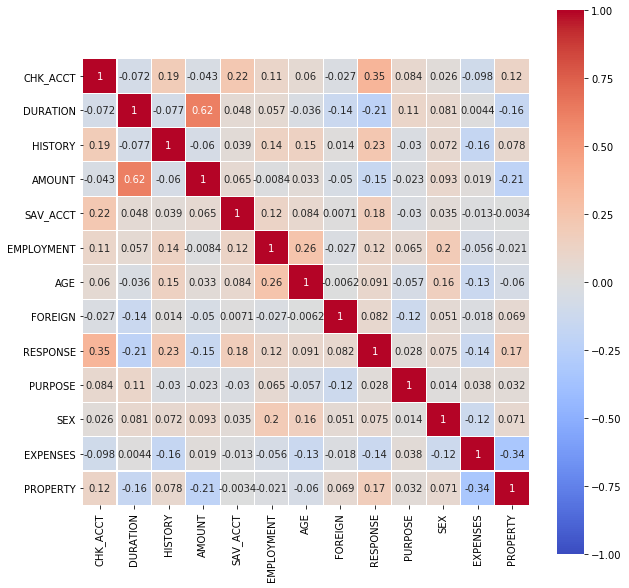

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_m.astype(float).corr(),linewidths=0.1,vmax=1.0,vmin=-1.0, 
            square=True,  linecolor='white', cmap='coolwarm', annot=True)

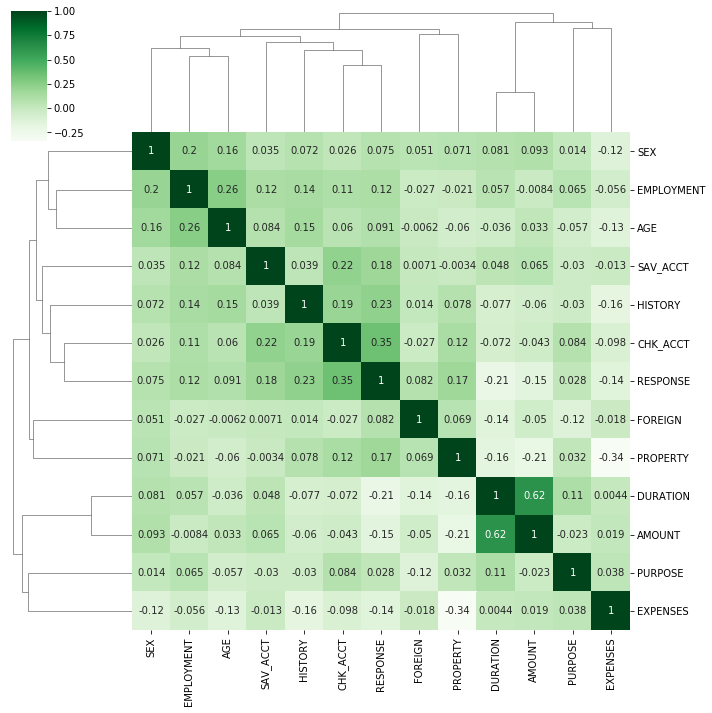

In [30]:
#heat map
sns.clustermap(data=df_m.corr(), annot=True, cmap='Greens')

According to the correlation matrix, there is a moderate correlation between credit amount and duration of the credit loan (r = 0.62). Property and expenses shows slightly negative correlation (r=-0.34).

Cluster heat map shows 2 main clusters. Duration, Amount, Purpose and Expenses cluster together while other variables cluster together.

#### DURATION vs AMOUNT

Regression plot below illustarates the correlation between "duration and amount".

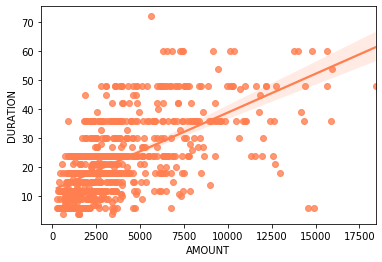

In [31]:
sns.regplot(y='DURATION',x='AMOUNT',data=df, color="coral") # regression plot 

It is clear from the above plot that applicants apply for longer duration for big credit loans which is not surprising.

## Section 4: Cluster Analysis

Here I have taken all the non-catogorical variables for cluster analysis

In [32]:
num_df = df_m[['AGE', 'DURATION', 'AMOUNT']]
num_df.head()

,AGE,DURATION,AMOUNT
0,67,6,1169
1,22,48,5951
2,49,12,2096
3,45,42,7882
4,53,24,4870


Then we need to normalize/standardize (i.e. μ = 0 and σ = 1) variables individually, before applying any machine learning model.

In [33]:
from sklearn import preprocessing
num_df_p = preprocessing.StandardScaler().fit_transform(num_df) # this results an array

KMeans clustering with k=3

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(num_df_p)

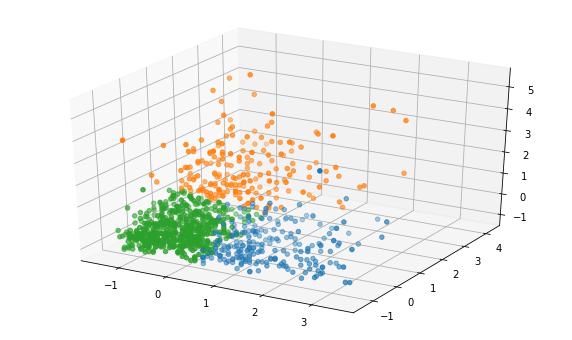

In [35]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_df_p[clusters ==i,0], num_df_p[clusters ==i,1],num_df_p[clusters ==i,2])

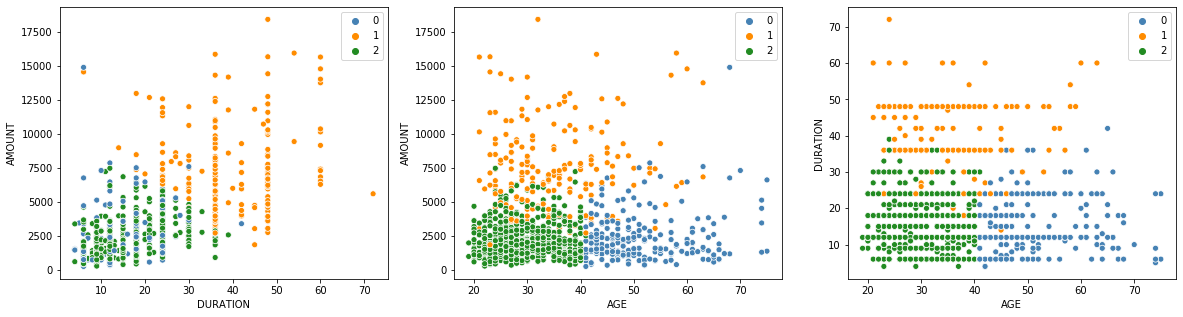

In [36]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(num_df['DURATION'], num_df['AMOUNT'], hue=clusters, ax=ax[0],palette=['steelblue','darkorange','forestgreen']);
sns.scatterplot(num_df['AGE'],num_df['AMOUNT'],hue=clusters, ax=ax[1],palette=['steelblue','darkorange','forestgreen']);
sns.scatterplot(num_df['AGE'],num_df['DURATION'],hue=clusters, ax=ax[2],palette=['steelblue','darkorange','forestgreen']);

In [37]:
# data frame of km.labels_
df1 = pd.DataFrame(km.labels_, columns = ['cluster'])
# merge it with 3 variables
df2 = num_df.join(df1, how='outer')
df2.head()

,AGE,DURATION,AMOUNT,cluster
0,67,6,1169,0
1,22,48,5951,1
2,49,12,2096,0
3,45,42,7882,1
4,53,24,4870,0


#### Size of Each Cluster

In [38]:
# get size of each cluster
df2.groupby('cluster').size()

cluster
0    224
1    190
2    586
dtype: int64

#### The mean values of each cluster in terms of different variables

In [39]:
# The mean values of each cluster in terms of different variables
mean_V=df2.groupby('cluster').mean()
mean_V

,AGE,DURATION,AMOUNT
cluster,,,
0,51.651786,15.848214,2398.473214
1,34.721053,39.257895,7587.210526
2,29.656997,16.883959,2205.511945


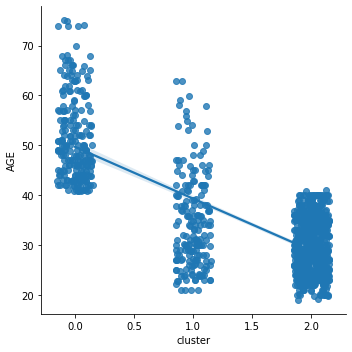

In [40]:
sns.lmplot("cluster", "AGE", df2, x_jitter=.15, y_jitter=.15)

Customers in cluster 1, on average, are older than cluster 2 and 3.

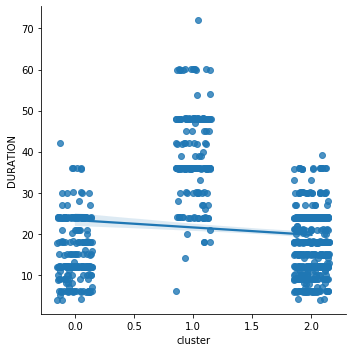

In [41]:
sns.lmplot("cluster", "DURATION", df2, x_jitter=.15, y_jitter=.15)

Customers in cluster 2, on average, take longer duration to pay back than cluster 1 and 3

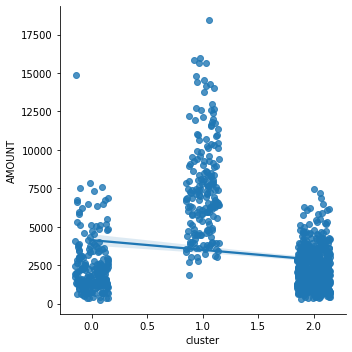

In [42]:
sns.lmplot("cluster", "AMOUNT", df2, x_jitter=.15, y_jitter=.15)

Customers in cluster 2, on average, take higher credit amount than cluster 1 and 3.

**3 clusters can be identified.**

Cluster-1 : Older people take less money for shorter duration

Cluster-2 : Middle aged people take higher amount of money longer duration

Cluster-3 : Younger people take less money for shorter duration

## Section 5: Model Building (Predictive/Classification analytics)

In [43]:
# declare X variables and y variable
y = df_m['RESPONSE']
x = df_m.drop(['RESPONSE'], axis=1)

In [44]:
# store column names in a list
colnames=x.columns.values.tolist()

In [45]:
# standerdize/ normalize data
x=preprocessing.StandardScaler().fit_transform(x)
print(x.shape,y.shape)

(1000, 12) (1000,)


In [46]:
# change array back in to a data frame to use with feature engineering
X = pd.DataFrame.from_records(x)
X.columns=colnames

In [47]:
# split data in to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('X_Train set:', X_train.shape,  y_train.shape)
print ('y_Test set:', X_test.shape,  y_test.shape)

X_Train set: (800, 12) (800,)
y_Test set: (200, 12) (200,)


These are the models to be tested for the accuracy.

1. KNN or k-Nearest Neighbor

2. Support Vector Machine

3. Decision Tree Classifier

4. Random Forest Classifier

5. Logistic Regression

6. Gaussian Naive Bayes

### KNN or k-Nearest Neighbor

[0.67  0.625 0.715 0.705 0.72  0.72  0.745 0.73  0.725]


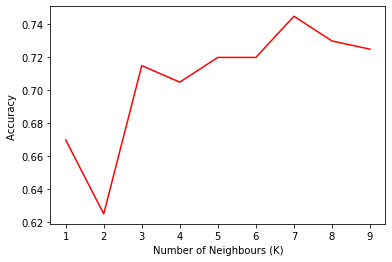

The best accuracy is with k = 7


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K = 10
mean_acc = np.zeros((K-1)) # create a array of zeroes of shape Ks-1 i.e 9

for n in range(1,K): # The range() function returns a sequence of numbers, starting from 0 by default,
                      #.... and increments by 1 (by default), and ends at a specified number.
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) #train the model for different k
    Yhat=knn.predict(X_test) # predict
    mean_acc[n-1] = metrics.accuracy_score(y_test, Yhat)

print(mean_acc)
plt.plot(range(1,K),mean_acc,'r')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()
print('The best accuracy is with k =', mean_acc.argmax()+1)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
KNNhat=KNN.predict(X_test)
KNN_ac=round(metrics.accuracy_score(y_test, KNNhat)*100,2)
KNN_roc=round(metrics.roc_auc_score(y_test, KNNhat)*100,2)
print("Accuracy score: ", KNN_ac)
print("AUC score: ", KNN_roc)

Accuracy score:  74.5
AUC score:  64.67


In [50]:
from sklearn import svm
SVM=svm.SVC(kernel='rbf').fit(X_train,y_train)
SVMhat=SVM.predict(X_test)
SVM_ac=round(metrics.accuracy_score(y_test, SVMhat)*100,2)
SVM_roc=round(metrics.roc_auc_score(y_test, SVMhat)*100,2)
print("Accuracy score: ", SVM_ac)
print("AUC score: ", SVM_roc)

Accuracy score:  74.0
AUC score:  63.32


In [51]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=0).fit(X_train,y_train)
DTChat=DTC.predict(X_test)
DTC_ac=round(metrics.accuracy_score(y_test, DTChat)*100,2)
DTC_roc=round(metrics.roc_auc_score(y_test, DTChat)*100,2)
print("Accuracy score: ", DTC_ac)
print("AUC score: ", DTC_roc)

Accuracy score:  74.0
AUC score:  65.79


In [52]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier().fit(X_train,y_train)
RFhat=RF.predict(X_test)
RF_ac=round(metrics.accuracy_score(y_test, RFhat)*100,2)
RF_roc=round(metrics.roc_auc_score(y_test, RFhat)*100,2)
print("Accuracy score: ", RF_ac)
print("AUC score: ", RF_roc)

Accuracy score:  74.0
AUC score:  64.31


In [53]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LRhat=LR.predict(X_test)
LR_ac=round(metrics.accuracy_score(y_test, LRhat)*100,2)
LR_roc=round(metrics.roc_auc_score(y_test, LRhat)*100,2)
print("Accuracy score: ", LR_ac)
print("AUC score: ", LR_roc)

Accuracy score:  79.5
AUC score:  73.14


In [54]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB().fit(X_train,y_train)
GNBhat=GNB.predict(X_test)
GNB_ac=round(metrics.accuracy_score(y_test, GNBhat)*100,2)
GNB_roc=round(metrics.roc_auc_score(y_test, GNBhat)*100,2)
print("Accuracy score: ", GNB_ac)
print("AUC score: ", GNB_roc)

Accuracy score:  74.5
AUC score:  73.54


Let's put the results in a data frame for easy comparison

In [55]:
list1=[KNNhat,SVMhat,DTChat,RFhat,LRhat,GNBhat]
list3=['KNN','SVM','Decision Tree','RandomForest','LogisticRegression','Gaussian Naive']
accuracy=[]
ROC_AUC=[]
# Calculating accuracy for each model
for ii in list1:
    accuracy.append(round(metrics.accuracy_score(y_test,ii)*100,2))
    ROC_AUC.append(round(metrics.roc_auc_score(y_test,ii)*100,2))
# Results in a data frame
Results=pd.DataFrame(list(zip(list3,accuracy,ROC_AUC)),columns=['Algorithm','Accuracy','ROC_AUC'])  
Results


,Algorithm,Accuracy,ROC_AUC
0,KNN,74.5,64.67
1,SVM,74.0,63.32
2,Decision Tree,74.0,65.79
3,RandomForest,74.0,64.31
4,LogisticRegression,79.5,73.14
5,Gaussian Naive,74.5,73.54


**From the above accuracy tests, Logistic Regression algorithm best predicts the credit risk of customers.**

In [56]:
print(round(metrics.accuracy_score(y_test, LRhat)*100,2))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, LRhat)) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, LRhat))
print("--------------------------------------------------------")
print(round(metrics.roc_auc_score(y_test, LRhat)*100,2))

79.5
--------------------------------------------------------
[[ 34  25]
 [ 16 125]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        59
           1       0.83      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200

--------------------------------------------------------
73.14


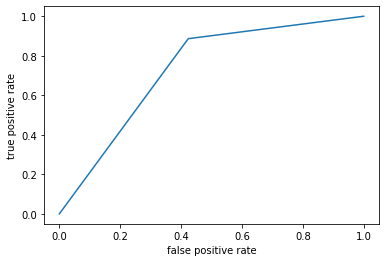

False-positive rate: [0.         0.42372881 1.        ]
True-positive rate:  [0.         0.88652482 1.        ]
AUC score:  0.7313980045678568


In [57]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,LRhat)
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print("False-positive rate:", fpr)
print("True-positive rate: ", tpr)
print("AUC score: ", metrics.roc_auc_score(y_test, LRhat))

Let's look at the best parameters for Logistic Regression

In [58]:
pd.DataFrame({'feature':X.columns, 'importance':LR.coef_[0]}).\
                                    sort_values('importance',ascending=False)

,feature,importance
0,CHK_ACCT,0.707635
2,HISTORY,0.385298
4,SAV_ACCT,0.377655
7,FOREIGN,0.235410
9,SEX,0.156995
11,PROPERTY,0.152791
8,PURPOSE,0.131495
5,EMPLOYMENT,0.127549
6,AGE,-0.002782
3,AMOUNT,-0.109837


Feature: 0, Score: 0.70764
Feature: 1, Score: -0.33869
Feature: 2, Score: 0.38530
Feature: 3, Score: -0.10984
Feature: 4, Score: 0.37766
Feature: 5, Score: 0.12755
Feature: 6, Score: -0.00278
Feature: 7, Score: 0.23541
Feature: 8, Score: 0.13149
Feature: 9, Score: 0.15700
Feature: 10, Score: -0.12236
Feature: 11, Score: 0.15279


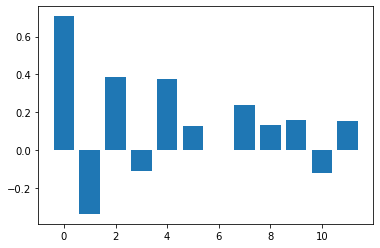

In [60]:
importance=LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

As see from the above dataframe and bar chart 'AGE' is not a good predictor for Logistic Regression model.

## Section 6: Summary

Applicants who are teenagers and young adults of age below 30 are mostly tend to default credit loans. They usually take less amount of money as loans but take longer to pay back. The applicants who take bigger loans for longer period of time has high chance to default as well. 

The other characteristics of applicants who default loans are,

- first time applicants and who has fulfilled earlier credit loans.
- have negative checking account balance or less than 200 DM.
- have less in savings.
- have no property.
- take loans in order to buy a new car or to spend for the education.
- females.
- employed for less than a year or are unemployed.
- have extra expenses.
- mostly locals.

On the otherhand,older applicants of age more than 30 pays back loans on time. Moreover, small credit loans applied for  shorter period of time has a high chance of fullfilling by applicants. In addition to that,

- applicants who have critical accounts and have delayed in the past,
- applicants with high amount of money in checking account or who doesnot have checking account,
- applicants who have more money in savings account,
- applicants who have a property such as real estate or own residance,
- applicants who take loans inorder to buy an used car,
- male applicants,
- applicants who are employed for more than 4 years or more,
- applicants who does not have extra expenses such as rent and other installments,
- foreign workers,
have high chance of paying back the loans on time.

Moreover, by using Kmeans clustering algorithm on non-catogorical variables 3 clusters have identified.
1. Older people take less money for short duration
2. Middle aged people take higher amount of money for long duration
3. Younger people take less money for short duration

